# BUSINESS UNDERSTANDING
# 1. SPECIFYING THE QUESTION
## Determine what type of films are currently successful and define business success criteria
## It's expected to use datasets provided to direct microsoft on the type of films to produce
## Objectives :
     > Determining the Budget
     > Determining the Director
     > Determinign the Genre
# 2. DEFINING METRIC OF SUCCESS
## It would be deemed successful if the question is answered and objectives met

# 3. EXPERIMENTAL DESIGN
## a) Loading datasets and preparing the data
## b) Data cleaning to deal with anomalies, outliers, duplicates and missing value
## c) Data analysis with EDA
## d) Conclusion and recommendation

# LOADING AND PREPARING DATA

In [331]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [332]:
#Dataset
dir_act_df = pd.read_csv('Mojo_budget_data.csv')
dir_act_df

,movie_id,movie_title,movie_year,director,writer,producer,composer,cinematographer,main_actor_1,main_actor_2,...,domestic,international,worldwide,mpaa,run_time,genre_1,genre_2,genre_3,genre_4,link
0,tt0118589,Glitter,2001,Vondie Curtis-Hall,Cheryl L. West,Laurence Mark,Terence Blanchard,Geoffrey Simpson,Mariah Carey,Eric Benét,...,4274407,997259,5271666,PG-13,1 hr 44 min,Drama,Music,Romance,NaN,https://www.boxofficemojo.com/title/tt0118589/...
1,tt0120630,Chicken Run,2000,Peter Lord,Peter Lord,Peter Lord,Harry Gregson-Williams,Simon Jacobs,Mel Gibson,Julia Sawalha,...,106834564,118000000,224834564,NaN,1 hr 24 min,Adventure,Animation,Comedy,Drama,https://www.boxofficemojo.com/title/tt0120630/...
2,tt0120667,Fantastic Four,2005,Tim Story,Mark Frost,Avi Arad,John Ottman,Oliver Wood,Ioan Gruffudd,Michael Chiklis,...,154696080,178839854,333535934,PG-13,1 hr 46 min,Action,Adventure,Family,Fantasy,https://www.boxofficemojo.com/title/tt0120667/...
3,tt0120679,Frida,2002,Julie Taymor,Hayden Herrera,Lindsay Flickinger,Elliot Goldenthal,Rodrigo Prieto,Salma Hayek,Alfred Molina,...,25885000,30413474,56298474,R,2 hr 3 min,Biography,Drama,Romance,NaN,https://www.boxofficemojo.com/title/tt0120679/...
4,tt0120681,From Hell,2001,Albert Hughes,Alan Moore,Jane Hamsher,Trevor Jones,Peter Deming,Johnny Depp,Heather Graham,...,31602566,42955549,74558115,R,2 hr 2 min,Horror,Mystery,Thriller,NaN,https://www.boxofficemojo.com/title/tt0120681/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,tt8688634,21 Bridges,2019,Brian Kirk,Adam Mervis,Chadwick Boseman,Alex Belcher,Paul Cameron,Chadwick Boseman,Sienna Miller,...,28539757,21400000,49939757,R,1 hr 39 min,Action,Crime,Drama,Thriller,https://www.boxofficemojo.com/title/tt8688634/...
2472,tt8946378,Knives Out,2019,Rian Johnson,Rian Johnson,Ram Bergman,Nathan Johnson,Steve Yedlin,Daniel Craig,Chris Evans,...,165363234,146189956,311553190,PG-13,2 hr 11 min,Comedy,Crime,Drama,Mystery,https://www.boxofficemojo.com/title/tt8946378/...
2473,tt9024106,Unplanned,2019,Chuck Konzelman,Abby Johnson,Chris Jones,Stephen Blake Kanicka,Drew Maw,Ashley Bratcher,Brooks Ryan,...,19005109,2046806,21051915,R,1 hr 49 min,Biography,Drama,NaN,NaN,https://www.boxofficemojo.com/title/tt9024106/...
2474,tt9134216,Playing with Fire,2019,Andy Fickman,Dan Ewen,Todd Garner,Nathan Wang,Dean Semler,John Cena,Keegan-Michael Key,...,44451847,24179822,68631669,PG,1 hr 36 min,Comedy,Family,NaN,NaN,https://www.boxofficemojo.com/title/tt9134216/...


In [333]:
#Checking column name
dir_act_df.columns

Index(['movie_id', 'movie_title', 'movie_year', 'director', 'writer',
       'producer', 'composer', 'cinematographer', 'main_actor_1',
       'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget', 'domestic',
       'international', 'worldwide', 'mpaa', 'run_time', 'genre_1', 'genre_2',
       'genre_3', 'genre_4', 'link'],
      dtype='object')

In [334]:
#Checking column datatypes
dir_act_df.dtypes

movie_id           object
movie_title        object
movie_year          int64
director           object
writer             object
producer           object
composer           object
cinematographer    object
main_actor_1       object
main_actor_2       object
main_actor_3       object
main_actor_4       object
budget              int64
domestic            int64
international       int64
worldwide           int64
mpaa               object
run_time           object
genre_1            object
genre_2            object
genre_3            object
genre_4            object
link               object
dtype: object

In [335]:
#Checking index start and stop
dir_act_df.index

RangeIndex(start=0, stop=2476, step=1)

In [336]:
#Checking shape
dir_act_df.shape

(2476, 23)

# DATA CLEANING

In [337]:
#Checking for missing values in dataset2
dir_act_df.isna().sum()

movie_id              0
movie_title           0
movie_year            0
director              0
writer                4
producer              5
composer             73
cinematographer      90
main_actor_1          0
main_actor_2          0
main_actor_3          0
main_actor_4          0
budget                0
domestic              0
international         0
worldwide             0
mpaa                 62
run_time              0
genre_1               0
genre_2             181
genre_3             746
genre_4            1573
link                  0
dtype: int64

In [338]:
#Dropping columns with missing values since they are not relevant to the objectives and others unnecessary to the analysis
dir_act_df.drop(['movie_id','movie_title','writer','producer','composer','cinematographer',
                'main_actor_2','main_actor_3','main_actor_4','domestic','international','mpaa',
                'run_time','genre_2','genre_3','genre_4','link'],axis=1,inplace=True)
dir_act_df

,movie_year,director,main_actor_1,budget,worldwide,genre_1
0,2001,Vondie Curtis-Hall,Mariah Carey,22000000,5271666,Drama
1,2000,Peter Lord,Mel Gibson,45000000,224834564,Adventure
2,2005,Tim Story,Ioan Gruffudd,100000000,333535934,Action
3,2002,Julie Taymor,Salma Hayek,12000000,56298474,Biography
4,2001,Albert Hughes,Johnny Depp,35000000,74558115,Horror
...,...,...,...,...,...,...
2471,2019,Brian Kirk,Chadwick Boseman,33000000,49939757,Action
2472,2019,Rian Johnson,Daniel Craig,40000000,311553190,Comedy
2473,2019,Chuck Konzelman,Ashley Bratcher,6000000,21051915,Biography
2474,2019,Andy Fickman,John Cena,29900000,68631669,Comedy


In [339]:
#Checking if there is still any missing values
dir_act_df.isna().sum()

movie_year      0
director        0
main_actor_1    0
budget          0
worldwide       0
genre_1         0
dtype: int64

In [340]:
#Checking for duplicates
dir_act_df.duplicated()
#No duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
2471    False
2472    False
2473    False
2474    False
2475    False
Length: 2476, dtype: bool

In [341]:
#Extracting all data from the desired year
dir_act_df = dir_act_df[dir_act_df.movie_year == 2019]
dir_act_df

,movie_year,director,main_actor_1,budget,worldwide,genre_1
800,2019,Edward Norton,Edward Norton,26000000,18477736,Crime
973,2019,Robert Rodriguez,Rosa Salazar,170000000,404852543,Action
999,2019,David F. Sandberg,Zachary Levi,100000000,365971656,Action
1224,2019,Kevin Kölsch,Jason Clarke,21000000,113118226,Horror
1325,2019,Justin Dec,Elizabeth Lail,6500000,48021766,Horror
...,...,...,...,...,...,...
2470,2019,Lars Klevberg,Tim Matheson,10000000,44902237,Horror
2471,2019,Brian Kirk,Chadwick Boseman,33000000,49939757,Action
2472,2019,Rian Johnson,Daniel Craig,40000000,311553190,Comedy
2473,2019,Chuck Konzelman,Ashley Bratcher,6000000,21051915,Biography


# DATA ANALYSIS

In [342]:
#Calculating the mean budget
mean_budget = int(dir_act_df.budget.mean())
mean_budget

58966666

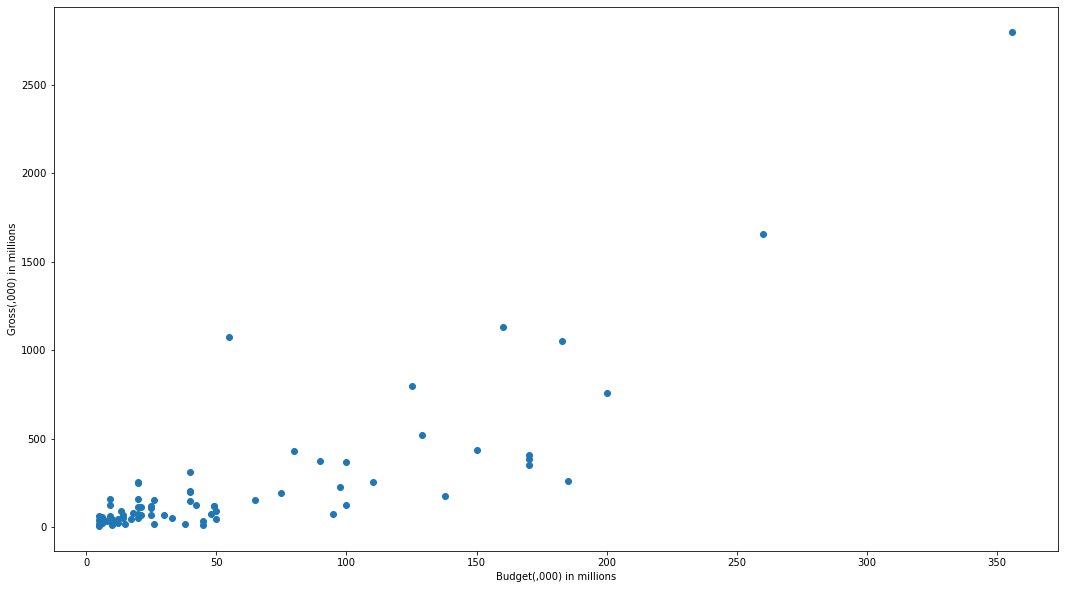

In [343]:
#Determining how budget relate to gross income
fig, ax = plt.subplots(figsize=(18,10))
ax.scatter(dir_act_df.budget/ 10**6,dir_act_df.worldwide/10**6)
ax.set_xlabel('Budget(,000) in millions')
ax.set_ylabel('Gross(,000) in millions');

In [344]:
#Checking on the correlation between budget and gross(worldwide)
dir_act_df.corr()

,movie_year,budget,worldwide
movie_year,NaN,NaN,NaN
budget,NaN,1.000000,0.822307
worldwide,NaN,0.822307,1.000000


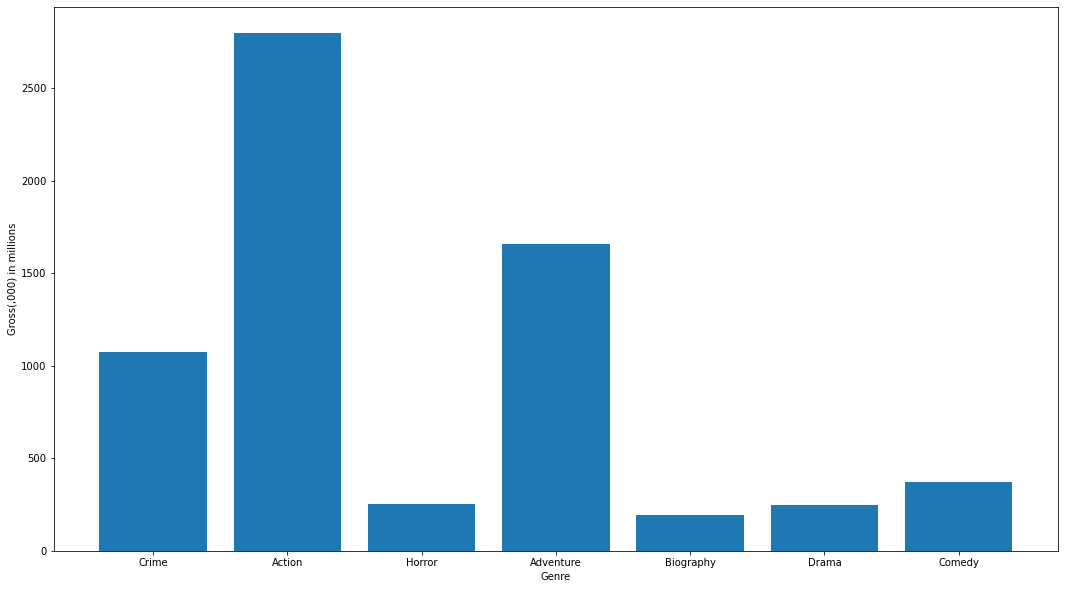

In [345]:
#Determining genre with highest return
x=dir_act_df.genre_1
y=dir_act_df.worldwide/ 10**6
fig, ax = plt.subplots(figsize=(18,10))
ax.bar(x,y)
ax.set_xlabel('Genre')
ax.set_ylabel('Gross(,000) in millions');

In [346]:
#Determining the mean gross
int(dir_act_df.worldwide.mean())

244520399

In [347]:
#Determing director fullfilling mean budget and gross return
director = dir_act_df[(dir_act_df['worldwide'] >= 244520399) & (dir_act_df['budget'] >= 58966666)]
director

,movie_year,director,main_actor_1,budget,worldwide,genre_1
973,2019,Robert Rodriguez,Rosa Salazar,170000000,404852543,Action
999,2019,David F. Sandberg,Zachary Levi,100000000,365971656,Action
2055,2019,F. Gary Gray,Chris Hemsworth,110000000,253890701,Action
2084,2019,Dean DeBlois,Jay Baruchel,129000000,521799505,Action
2250,2019,Michael Dougherty,Kyle Chandler,170000000,386600138,Action
2265,2019,Tim Burton,Colin Farrell,170000000,353284621,Adventure
2285,2019,Anthony Russo,Robert Downey Jr.,356000000,2797800564,Action
2355,2019,Chris Renaud,Patton Oswalt,80000000,430051293,Adventure
2388,2019,Rob Letterman,Ryan Reynolds,150000000,433005346,Action
2395,2019,Jon Favreau,Donald Glover,260000000,1656943394,Adventure


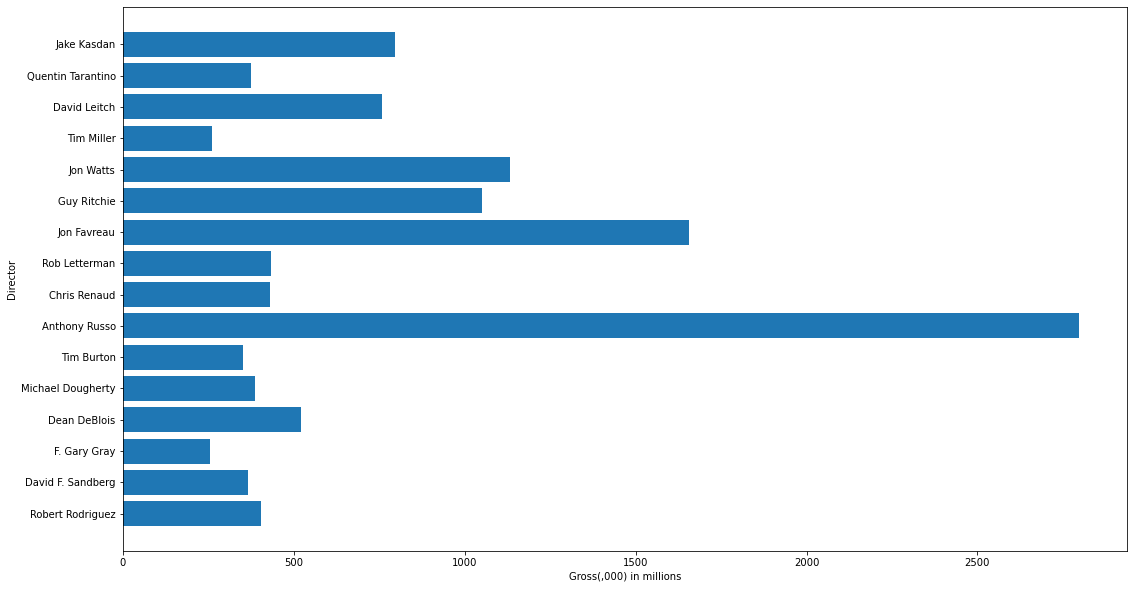

In [348]:
#Visualization of directors names who meet requires service outcome
x=director.director
y=director.worldwide/ 10 **6
fig, ax = plt.subplots(figsize=(18,10))
ax.barh(x,y)
ax.set_xlabel('Gross(,000) in millions')
ax.set_ylabel('Director');

# CONCLUSION AND RECOMMENDATION

# CONCLUSION
## In conclusion:
     >Budget and gross have a weak correlation hence it's not safe to conclude that a higher budget reflects to a higher 
      gross income
     >Action is the most successfull genre by a mile.Adventure and crime films are also fairly successful
     >Anthony Russo Is the most successfull film maker.Jon Favreau and Jon Watts are also fairly successfull
# RECOMMENDATION
## It's recommended:
     >Having a budget within the mean budget
     >Production of action adventure or crime films
     >Hiring either of the three most performing directors